In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='CONV1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='POOL1'))
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='CONV2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='POOL2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(120, activation='relu', name='FC3'))
model.add(Dense(84, activation='relu', name='FC4'))
model.add(Dense(10, activation='softmax', name='FC5'))



#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
POOL1 (MaxPooling2D)         (None, 14, 14, 6)         0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 10, 10, 16)        2416      
_________________________________________________________________
POOL2 (MaxPooling2D)         (None, 5, 5, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
FC3 (Dense)                  (None, 120)               48120     
_________________________________________________________________
FC4 (Dense)                  (None, 84)               

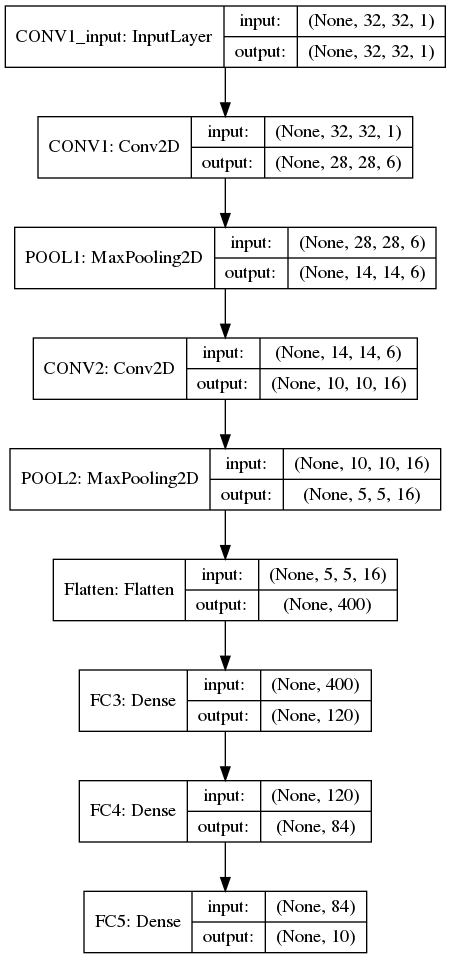

In [8]:
from keras.utils import plot_model
plot_model(model,show_layer_names=True, show_shapes=True, to_file='model.png',rankdir='TB')

In [10]:
from keras.applications import VGG16

In [11]:
m = VGG16()

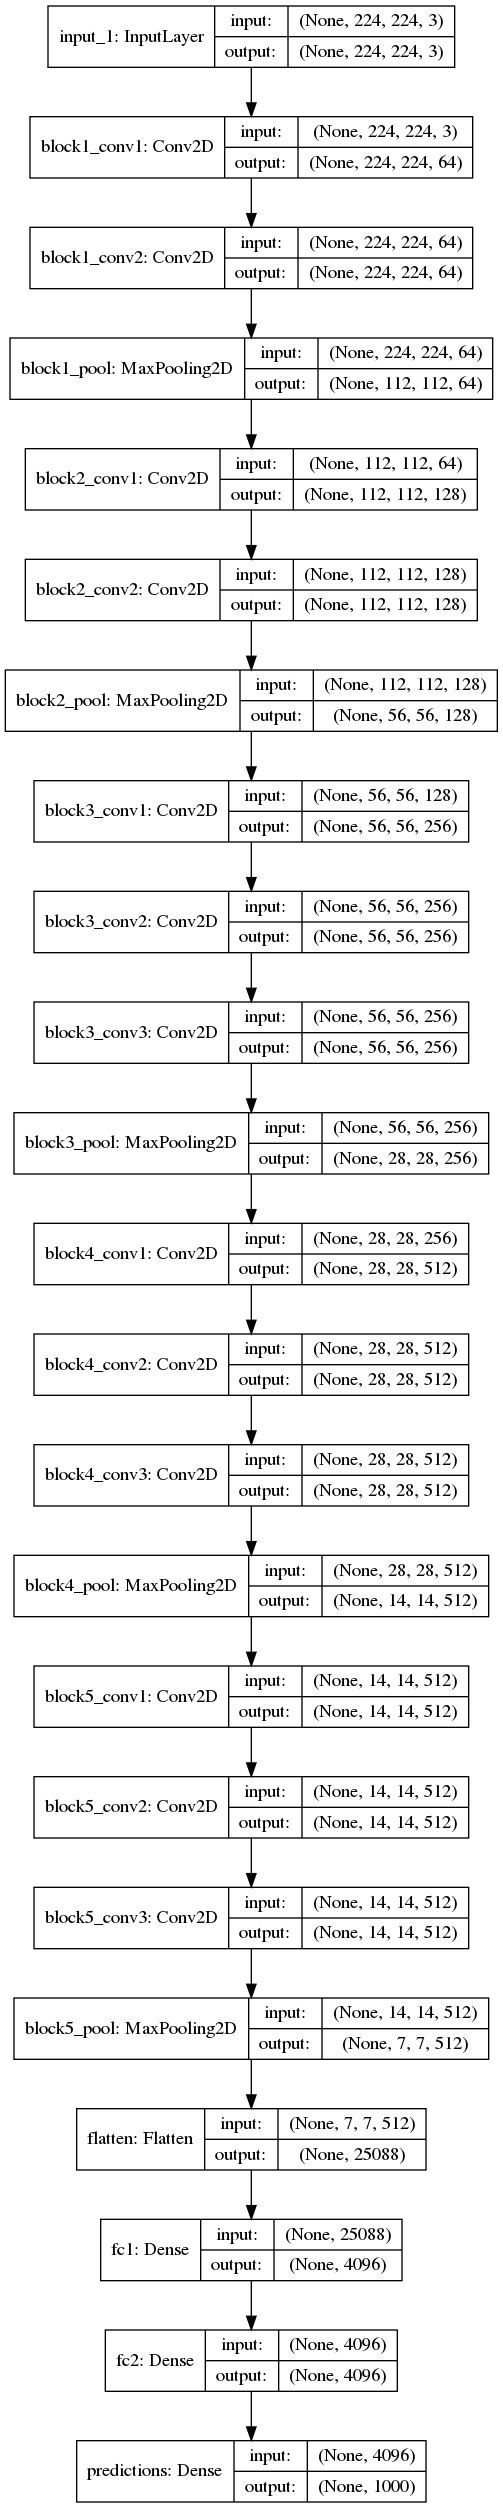

In [12]:
plot_model(m,show_layer_names=True, show_shapes=True, to_file='VGG16.png',rankdir='TB')

In [13]:
m.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
img = mpimg.imread('iitgn.jpeg')     

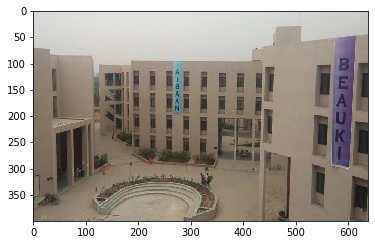

In [20]:
plt.imshow(img)

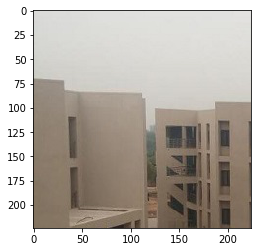

In [22]:
plt.imshow(img[:224, :224])

In [23]:
img_cropped = img[:224, :224]

In [59]:
import pandas as pd

ser = pd.Series(m.predict((img_cropped/img_cropped.max()).reshape(1, 224, 224, 3)).flatten())

In [60]:
from keras.applications.imagenet_utils import decode_predictions


In [58]:
print('Predicted:', decode_predictions(m.predict(img_cropped.reshape(1, 224, 224, 3)), top=10))

40960/35363 [==================================] - 0s 2us/step
Predicted: [[('n04099969', 'rocking_chair', 0.17958917), ('n03201208', 'dining_table', 0.17839444), ('n04550184', 'wardrobe', 0.14661051), ('n02870880', 'bookcase', 0.091840535), ('n03131574', 'crib', 0.051306404), ('n03179701', 'desk', 0.04119461), ('n04239074', 'sliding_door', 0.020480007), ('n04501370', 'turnstile', 0.0189306), ('n03742115', 'medicine_chest', 0.016860707), ('n03127925', 'crate', 0.01578684)]]


In [61]:
print('Predicted:', decode_predictions(m.predict(img_cropped.reshape(1, 224, 224, 3)), top=10))

Predicted: [[('n04099969', 'rocking_chair', 0.17958917), ('n03201208', 'dining_table', 0.17839444), ('n04550184', 'wardrobe', 0.14661051), ('n02870880', 'bookcase', 0.091840535), ('n03131574', 'crib', 0.051306404), ('n03179701', 'desk', 0.04119461), ('n04239074', 'sliding_door', 0.020480007), ('n04501370', 'turnstile', 0.0189306), ('n03742115', 'medicine_chest', 0.016860707), ('n03127925', 'crate', 0.01578684)]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

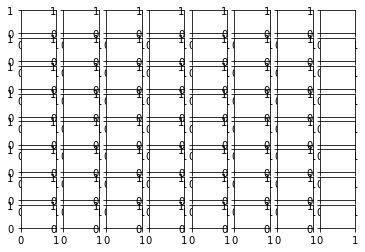

In [73]:
fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i/8, i%8].imshow(m.weights[0][: ,:, :, i])
    ax.set_axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


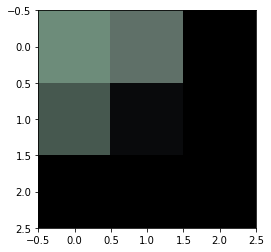

In [74]:
plt.imshow(m.weights[0][: ,:, :, i])

In [78]:
m.weights[0]

<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355